Text(0, 0.5, '$p_{u}$')

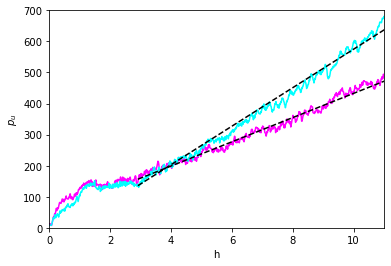

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

###plot raw pressure/depth data and nondimensionalize to prove###

#load in raw force/depth measurements (Fy/z)
df = np.asarray(pd.read_csv('Data/VolumeFracTrials.csv', header = None))

rawFy057 = df[:,1]
rawZ057 = df[:,0]

rawFy059 = df[:,4]
rawZ059 = df[:,3]

#calculate pressure --> (Pz = Fy / A (of inruder))
A = 0.00016129 #area of lab intruder
A_f = 0.00005041 #area of field intruder

Pz057 = rawFy057 / A
Pz059 = rawFy059 / A

#nondimensionalize pressure --> Pu = Pz / (pb)(g)(Re)
pb_57 = 2500 * 0.57 #bulk density 0.57
pb_59 = 2500 * 0.59 #bulk density 0.59
g = 9.8 #gravity
Re = 0.00635 # radius of intruder

raw_pu_057 = Pz057 / (pb_57 * g * Re)
raw_pu_059 = Pz059 / (pb_59 * g * Re)

#nondimensionalize depth --> (h = z / Re)
rawh057 = rawZ057 / Re
rawh059 = rawZ059 / Re

#plot
plt.plot(rawh057-1.5, -raw_pu_057, label = '\u03A6 = 0.57', color = "magenta") #-1.5 to fix where the 'surface' is (so ground starts at 0)
plt.plot(rawh059-1.5, -raw_pu_059, label = '\u03A6 = 0.59', color = "cyan") #-1.5 to fix where the 'surface' is (so ground starts at 0)
plt.xlim(0,11)
plt.ylim(0,700)

#linear fit --> finding stiffness (y = mx + b) --> pu = Kh + po
#fit for phi = 0.57
plt.plot(rawh057+2.9, 39*rawh057+156, linestyle='dashed', color = 'black') 

#fit for phi = 0.59
plt.plot(rawh059+2.9, 62*rawh059+135, linestyle='dashed', color = 'black')

#legend
#plt.legend()
plt.xlabel('h')
plt.ylabel(r'$p_{u}$')